In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# I'm loading the data from the CSV file using ';' as delimiter since each
# attribute is separated by ';'
data = pd.read_csv("dados_reduzidos.csv", delimiter=";")

In [67]:
# Each sample has an ID, so i'm using this ID as the dataframe index
data.set_index("id", inplace=True)

In [68]:
data

,valor_total,area_util,quartos,vagas,valor_condominio,suites,banheiros,piscina,academia,quadra,...,bairro,qtd_dados_bairro,media_idh,expectativa_vida,renda_percapita,estacao_prox,linha_prox,dist,lat,lon
id,,,,,,,,,,,,,,,,,,,,,
526,189900,32,2,1,180.0,0,1,0,1,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",SÃO MATEUS,PRATA,"6822,823684","-23,5838787","-46,417548"
734,221110,43,2,1,250.0,0,1,0,0,1,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4682,709841","-23,5435347","-46,4254919"
738,219990,43,1,1,300.0,0,1,1,0,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4579,311123","-23,5373392","-46,4268225"
753,219990,43,2,1,300.0,0,1,1,0,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4579,311123","-23,5373392","-46,4268225"
924,220000,41,2,1,300.0,0,1,1,1,1,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"3313,918703","-23,5577993","-46,4435232"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,400000,61,1,0,NaN,0,1,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"517,30702","-23,5492334","-46,6442819"
2233,688000,146,2,1,600.0,1,3,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"452,9508368","-23,5487055","-46,6438873"
2234,275000,40,1,0,382.0,0,1,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"362,4140008","-23,5468044","-46,6459634"


In [69]:
# I'm verifying if there is any empty sample by count how many
# columns have missing values
# As we can see, 'valor_condominio' and 'qtd_dados_bairro' have some missing data
data.isna().sum()

valor_total           0
area_util             0
quartos               0
vagas                 0
valor_condominio    235
suites                0
banheiros             0
piscina               0
academia              0
quadra                0
link                  0
bairro                0
qtd_dados_bairro      7
media_idh             0
expectativa_vida      0
renda_percapita       0
estacao_prox          0
linha_prox            0
dist                  0
lat                   0
lon                   0
dtype: int64

In [70]:
# For the samples with no 'valor_condominio' it can means the item is a 'house' so it has no 'valor_condominio'
data.loc[data['valor_condominio'].isna(), 'valor_condominio'] = 0

In [71]:
# Since we have missing values in 'qtd_dados_bairro' and this column means the amount of
# samples per neighborhood, we can drop it and recalculate it using 'groupby' from pandas
data.drop('qtd_dados_bairro', axis=1, inplace=True)

In [72]:
# Now we have no missing values
data.isna().sum()

valor_total         0
area_util           0
quartos             0
vagas               0
valor_condominio    0
suites              0
banheiros           0
piscina             0
academia            0
quadra              0
link                0
bairro              0
media_idh           0
expectativa_vida    0
renda_percapita     0
estacao_prox        0
linha_prox          0
dist                0
lat                 0
lon                 0
dtype: int64

In [73]:
# Here, we can see that some values that look like numeric values in dataframe
# are not a numeric type
data.dtypes

valor_total           int64
area_util             int64
quartos               int64
vagas                 int64
valor_condominio    float64
suites                int64
banheiros             int64
piscina               int64
academia              int64
quadra                int64
link                 object
bairro               object
media_idh            object
expectativa_vida     object
renda_percapita      object
estacao_prox         object
linha_prox           object
dist                 object
lat                  object
lon                  object
dtype: object

In [74]:
def make_float(row):
    to_parse = ['lat', 'lon', 'media_idh', 'renda_percapita', 'expectativa_vida', 'dist']
    for column in to_parse:
        row[column] = float(row[column].replace(",", "."))
    return row

In [75]:
# This function parse the numeric values to a float
data = data.apply(make_float , axis=1)

In [76]:
data.dtypes

valor_total           int64
area_util             int64
quartos               int64
vagas                 int64
valor_condominio    float64
suites                int64
banheiros             int64
piscina               int64
academia              int64
quadra                int64
link                 object
bairro               object
media_idh           float64
expectativa_vida    float64
renda_percapita     float64
estacao_prox         object
linha_prox           object
dist                float64
lat                 float64
lon                 float64
dtype: object

Text(0.5, 1.0, 'Util area x Total price')

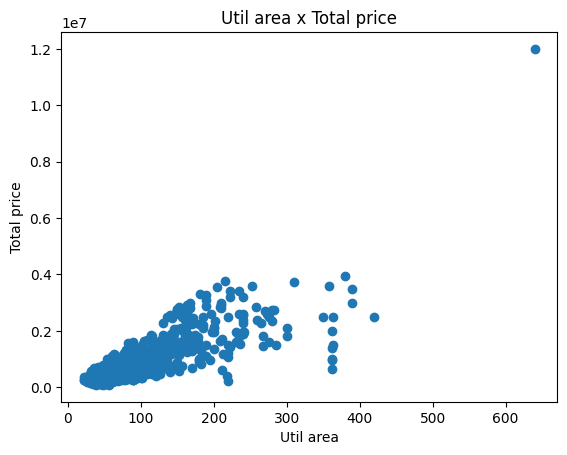

In [77]:
# Here, I try to see the relation between the util area versus the price of the property
plt.scatter(data["area_util"], data["valor_total"])
plt.xlabel("Util area")
plt.ylabel("Total price")
plt.title("Util area x Total price")

# We can see that when the util area increases the price also increases